In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
# check the original e(b-v)... How is it possible that for IDENTICAL objects, the E(B-V) for IN2P3 
# is not IDENTICAL to that in NCSA ? 
dir_info_files = '/astro/store/scratch/tmp/suberlak/S13Agg/repo_fls/'

ebv_ncsa = pd.read_table(dir_info_files+'ebv_NCSA_lt235.dat.gz', delimiter=' ', usecols=[0,1])
ebv_ncsa.columns = ['objectId','ebv']
ebv_intpt = pd.read_table(dir_info_files+ 'ebv_IN2P3_lt230.dat.gz', delimiter=' ', usecols=[0,1])
ebv_intpt.columns = ['objectId','ebv'] 

In [4]:
# How many objects overlap between IN2P3 and NCSA 
np.sum(np.in1d(ebv_intpt['objectId'].values, ebv_ncsa['objectId'].values))

332239

In [5]:
# Select duplicates 
mask_duplicates_intpt = np.in1d(ebv_intpt['objectId'].values, ebv_ncsa['objectId'].values)
intpt_duplicates =  ebv_intpt[mask_duplicates_intpt]

mask_duplicates_ncsa = np.in1d(ebv_ncsa['objectId'].values, ebv_intpt['objectId'].values)
ncsa_duplicates = ebv_ncsa[mask_duplicates_ncsa]

In [18]:
ebv_dups_merged = pd.merge(intpt_duplicates, ncsa_duplicates, on='objectId',suffixes=('_intpt','_ncsa'))

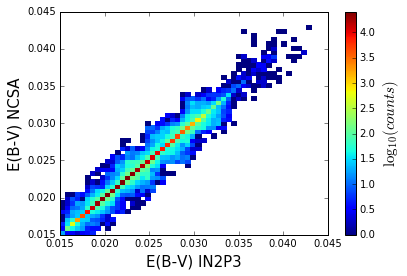

In [19]:
%matplotlib inline 
fig,ax = plt.subplots()

x = ebv_dups_merged['ebv_intpt'].values
mask_x = x < 160
y = ebv_dups_merged['ebv_ncsa'].values
mask_y = y < 160

mask_xy = mask_x * mask_y 

H, xedges, yedges = np.histogram2d(x[mask_xy], y[mask_xy], bins=50)
H = np.rot90(H)
H = np.flipud(H)
# Mask zeros
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zeropltssssss
# Plot 2D histogram using pcolor
cmap = ax.pcolormesh(xedges,yedges,np.log10(Hmasked), cmap='jet')
ax.set_xlabel('E(B-V) IN2P3', fontsize=15)
ax.set_ylabel('E(B-V) NCSA', fontsize=15)
cbar = plt.colorbar(cmap)
cbar.set_label(r'$\log_{10}(counts)$', fontsize=15)
plt.savefig('in2p3_ncsa_ebv_comp')

In [20]:
ebv_dups_merged.head()

,objectId,ebv_intpt,ebv_ncsa
0,3254565558288976,0.019397,0.019397
1,3254565558288977,0.019750,0.019750
2,3254565558288993,0.019761,0.019761
3,3254565558288995,0.019426,0.019426
4,3254565558288998,0.021280,0.021280


In [27]:
# Check those patches ...

patch_bounds = pd.read_table(dir_info_files+'coaddBounds.txt', delim_whitespace=True)

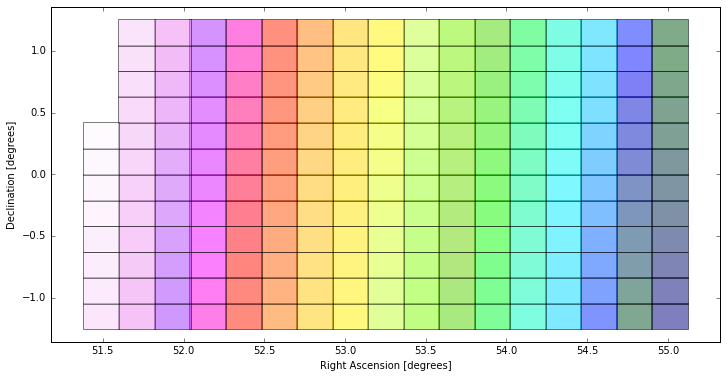

In [142]:
%matplotlib inline 

from matplotlib.patches import Rectangle
fig,ax = plt.subplots(figsize=(12,6))

N =200

# set color iterator 
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0, 1,N)]

c = np.append(patch_bounds['minRA'].values[:N],patch_bounds['maxRA'].values[:N])
ra_min, ra_max = min(c), max(c)
d = np.append(patch_bounds['minDec'].values[:N],patch_bounds['maxDec'].values[:N])
dec_min, dec_max = min(d), max(d)

delta_ra_store = []
delta_dec_store = []

for i in range(len(patch_bounds[:N])):
    min_ra = min(patch_bounds['minRA'].values[i], patch_bounds['maxRA'].values[i])
    min_dec = min(patch_bounds['minDec'].values[i], patch_bounds['maxDec'].values[i])

    delta_ra = abs(patch_bounds['maxRA'].values[i]-patch_bounds['minRA'].values[i])
    delta_dec = abs(patch_bounds['maxDec'].values[i]- patch_bounds['minDec'].values[i])
    delta_ra_store.append(delta_ra)
    delta_dec_store.append(delta_dec)
    ax.add_patch(Rectangle((min_ra,min_dec), delta_ra,delta_dec, facecolor=colors[i], alpha=0.5))
ax.set_xlim(ra_min-0.2, ra_max+0.2)
ax.set_ylim(dec_min-0.1, dec_max+0.1)
ax.set_xlabel('Right Ascension [degrees]')
ax.set_ylabel('Declination [degrees]')
ax.set_title('SDSS S82 '+str(N)+' patches ')

In [138]:
print('Median RA width of a patch is %f degrees (=%f mins) '%(np.median(delta_ra_store), 60*np.median(delta_ra_store)))
print('Median dec height of a patch is %f degrees (=%f mins)'%(np.median(delta_dec_store),60*np.median(delta_dec_store)))


Median RA width of a patch is 0.226600 degrees (=13.596000 mins) 
Median dec height of a patch is 0.216380 degrees (=12.982800 mins)


(array([ 214.,  227.,  202.,  220.,  208.,  196.,  222.,  197.,  213.,  222.]),
 array([ 320.28325 ,  324.243249,  328.203248,  332.163247,  336.123246,
         340.083245,  344.043244,  348.003243,  351.963242,  355.923241,
         359.88324 ]),
 <a list of 10 Patch objects>)

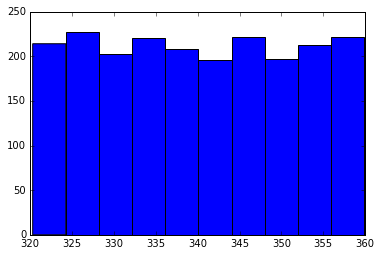

In [148]:
plt.hist(patch_bounds['minRA'].values[patch_bounds['minRA'].values>200])

In [157]:
max(patch_bounds['maxRA'].values[patch_bounds['maxRA'].values < 200 ])

54.896640000000005

In [163]:
len(np.unique(patch_bounds['maxDec'].values))

12

In [99]:
a = patch_bounds['minRA'].values[:N]
b = patch_bounds['maxRA'].values[:N]
c = np.append(a,b)

In [164]:
433 * 12


5196